In [ ]:
%config InlineBackend.figure_format = "retina"
%matplotlib inline
import matplotlib
from matplotlib import rcParams
import matplotlib.pyplot as plt

rcParams["savefig.dpi"] = 100
rcParams["figure.figsize"] = [10, 5]
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 14

In [ ]:
import jax.numpy as jnp
from jax import jit
import numpy as np

In [ ]:
# Hidden process

A = jnp.eye(2)
B = 0 * jnp.asarray(([1., 0.], [0., -1.]))
Q = 0.1 * jnp.eye(2)


# Measurement process

H = jnp.eye(2)
R = 1 * jnp.eye(2)

In [ ]:
def fwd_process(x, u):
    x_new = A @ x
    x_new += B @ u
    x_new += np.random.multivariate_normal([0,0], Q)
    return x_new

def measurement(x):
    z = H @ x
    z += np.random.multivariate_normal([0,0], R)
    return z


In [ ]:
# Simulation

no_steps = 100
times = jnp.linspace(0, 10, no_steps)
x_initial = jnp.asarray([1., 3])

xs = [x_initial]
us = []
zs = []

for i in range(no_steps):
    time = times[i]
    x_last = xs[-1]
    u_last = jnp.asarray([0.1 * np.sin(0.1 * time), -0.5 * np.cos(0.2 * time)])
    us.append(u_last)
    zs.append(measurement(x_last))

    x_new = fwd_process(x_last, u_last)
    xs.append(x_new)

xs.pop()


Array([-0.49777067,  0.6655015 ], dtype=float32)

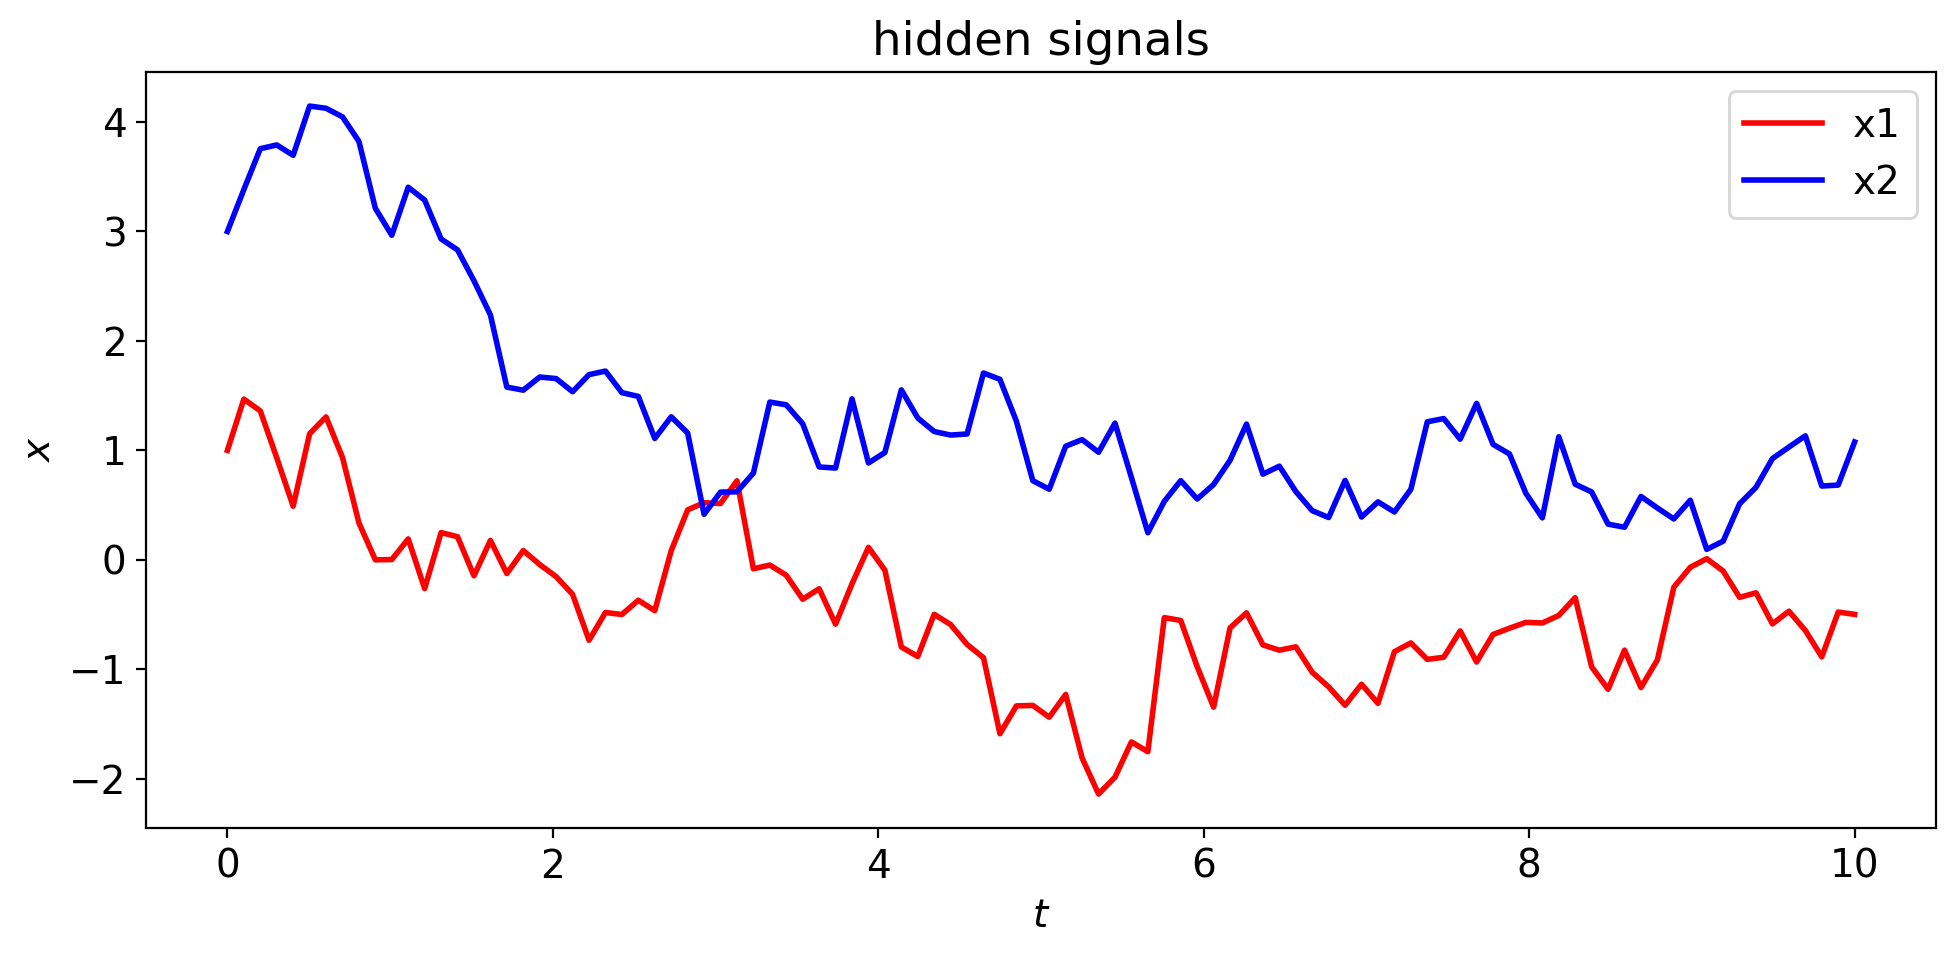

In [ ]:
# Plot results

xdata = times
ydata = jnp.asarray(xs)

fig, ax1 = plt.subplots()

# Price
color = 'k'
ax1.set_xlabel('$t$')
ax1.set_ylabel('$x$', color=color)
ax1.plot(xdata, ydata[:,0], color='red', label='x1', lw=2)
ax1.plot(xdata, ydata[:,1], color='blue', label='x2', lw=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.legend()
plt.title('hidden signals')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

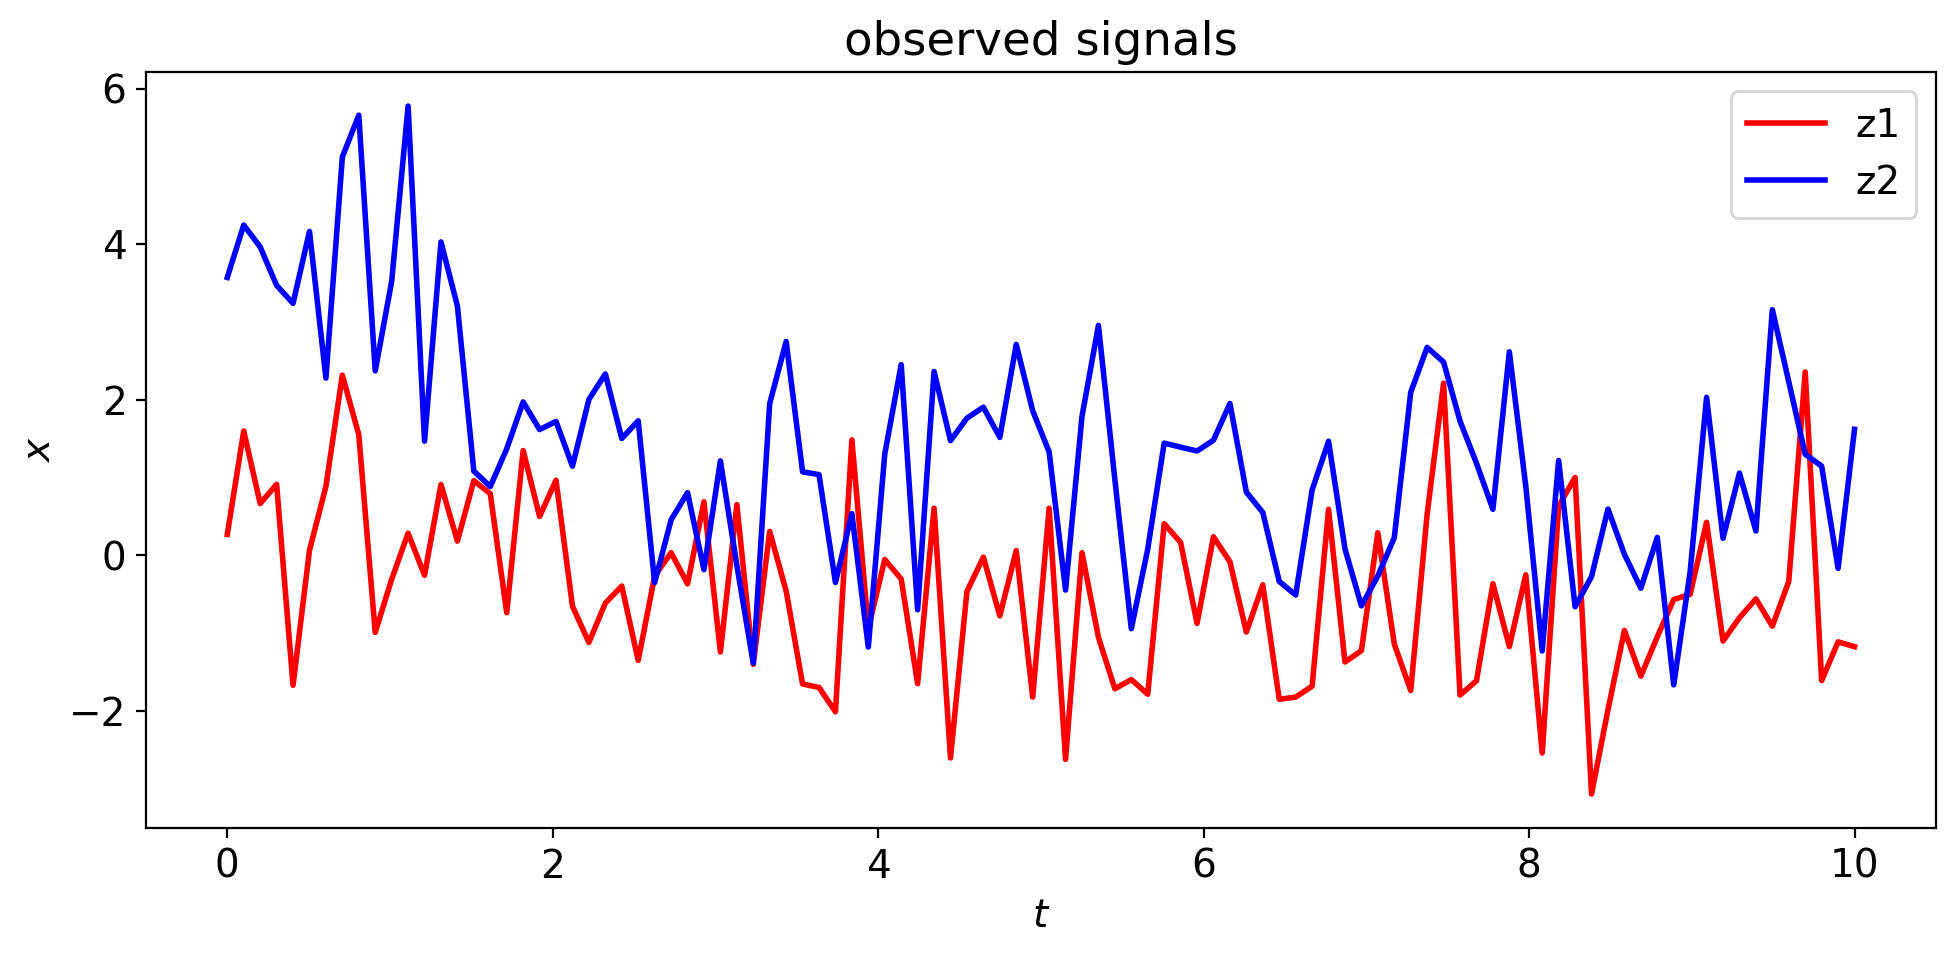

In [ ]:
# Plot results

xdata = times
ydata = jnp.asarray(zs)

fig, ax1 = plt.subplots()

# Price
color = 'k'
ax1.set_xlabel('$t$')
ax1.set_ylabel('$x$', color=color)
ax1.plot(xdata, ydata[:,0], color='red', label='z1', lw=2)
ax1.plot(xdata, ydata[:,1], color='blue', label='z2', lw=2)
#ax1.plot(xdata, ydata[:,2], color='green', label='z3', lw=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.legend()
plt.title('observed signals')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
# Apply Kalman Filter

x_hats = []
P_hats = []

P_initial = 10*jnp.eye(2)

for i in range(no_steps):

    # Initial guess
    if i == 0:
        x_hat_last = x_initial
        P_hat_last = P_initial

    # Update using dynamics
    u_last = 0
    x_hat_minus = A @ x_hat_last # + B @ u_last
    P_hat_minus = A @ P_hat_last @ A.T + Q

    # Correct
    z_now = zs[i]
    K = P_hat_minus @ H.T @ jnp.linalg.inv(H @ P_hat_minus @ H.T + R)
    x_hat_now = x_hat_minus + K @ (z_now - H @ x_hat_minus)
    P_hat_now = (jnp.eye(P_hat_minus.shape[0]) - K @ H) @ P_hat_minus

    # Save
    x_hat_last = x_hat_now
    P_hat_last = P_hat_now

    x_hats.append(x_hat_last)
    P_hats.append(P_hat_last)


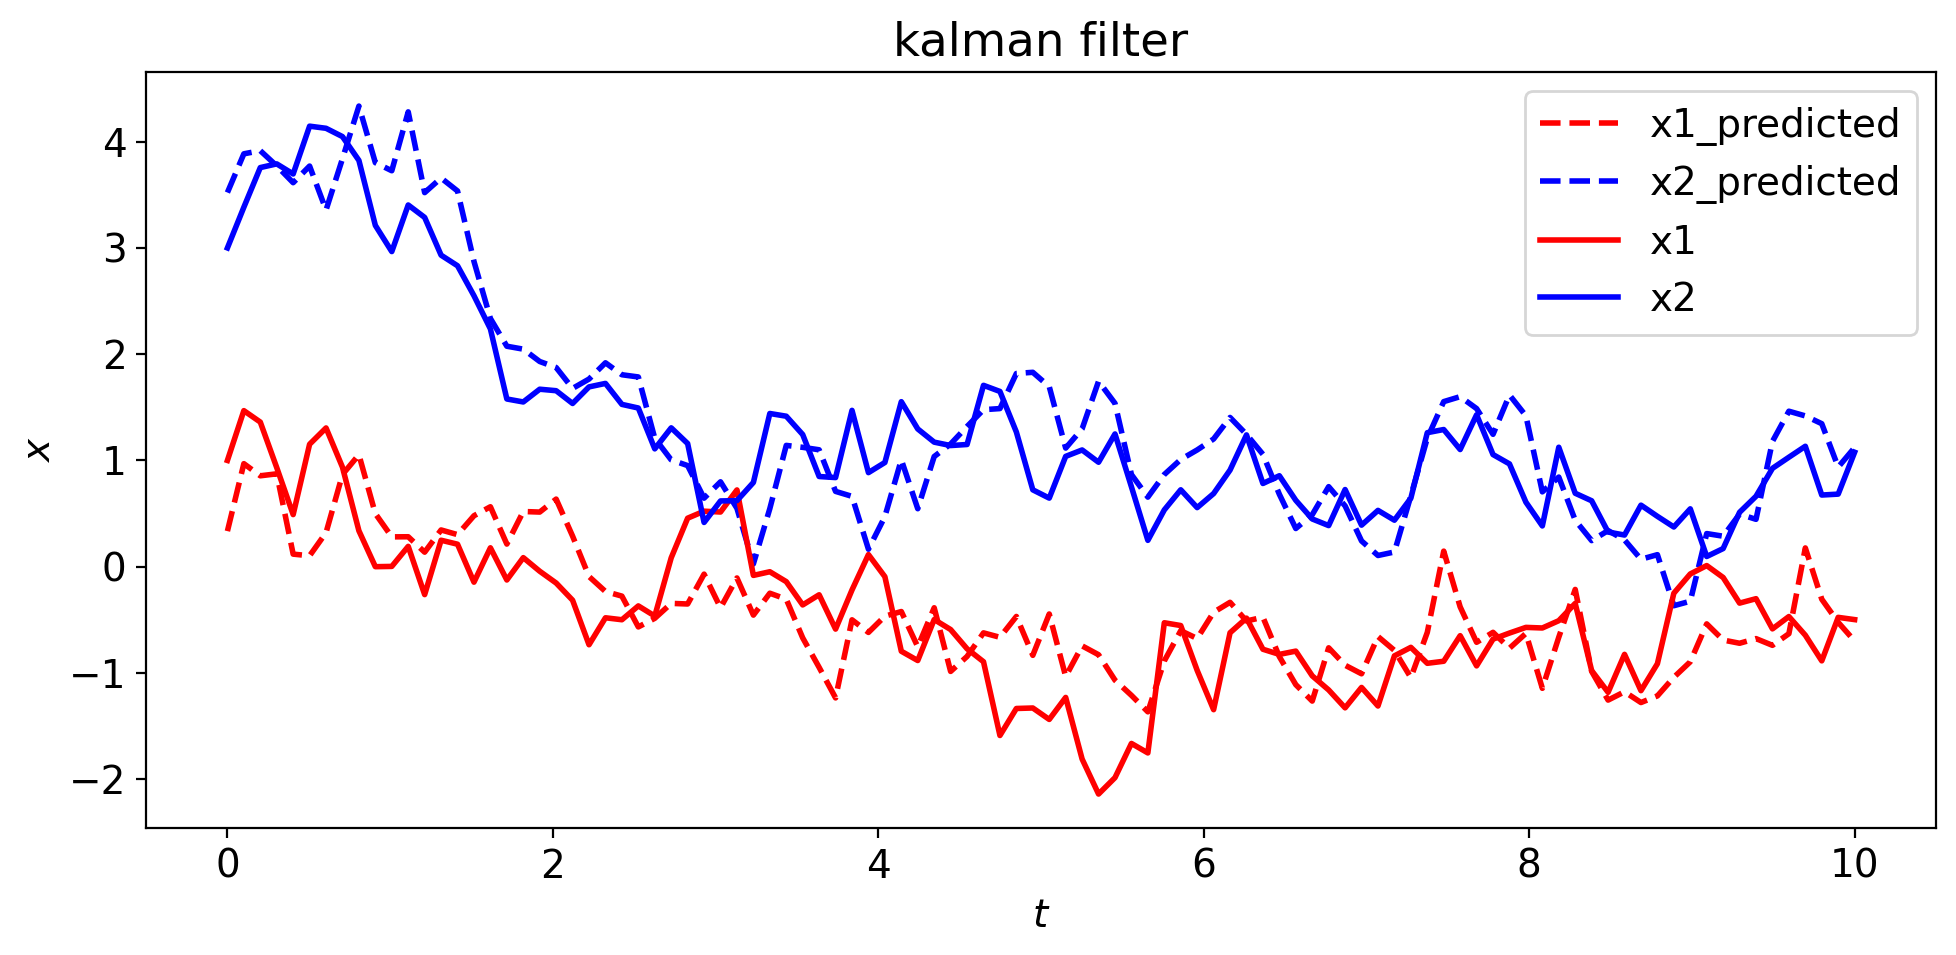

In [ ]:
# Plot results

xdata = times
ydata = jnp.asarray(x_hats)

fig, ax1 = plt.subplots()

# Price
color = 'k'
ax1.set_xlabel('$t$')
ax1.set_ylabel('$x$', color=color)
ax1.plot(xdata, ydata[:,0], color='red', label='x1_predicted', lw=2, linestyle='dashed')
ax1.plot(xdata, ydata[:,1], color='blue', label='x2_predicted', lw=2, linestyle='dashed')

ydata = jnp.asarray(xs)
ax1.plot(xdata, ydata[:,0], color='red', label='x1', lw=2)
ax1.plot(xdata, ydata[:,1], color='blue', label='x2', lw=2)

ax1.tick_params(axis='y', labelcolor=color)
plt.legend()
plt.title('kalman filter')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

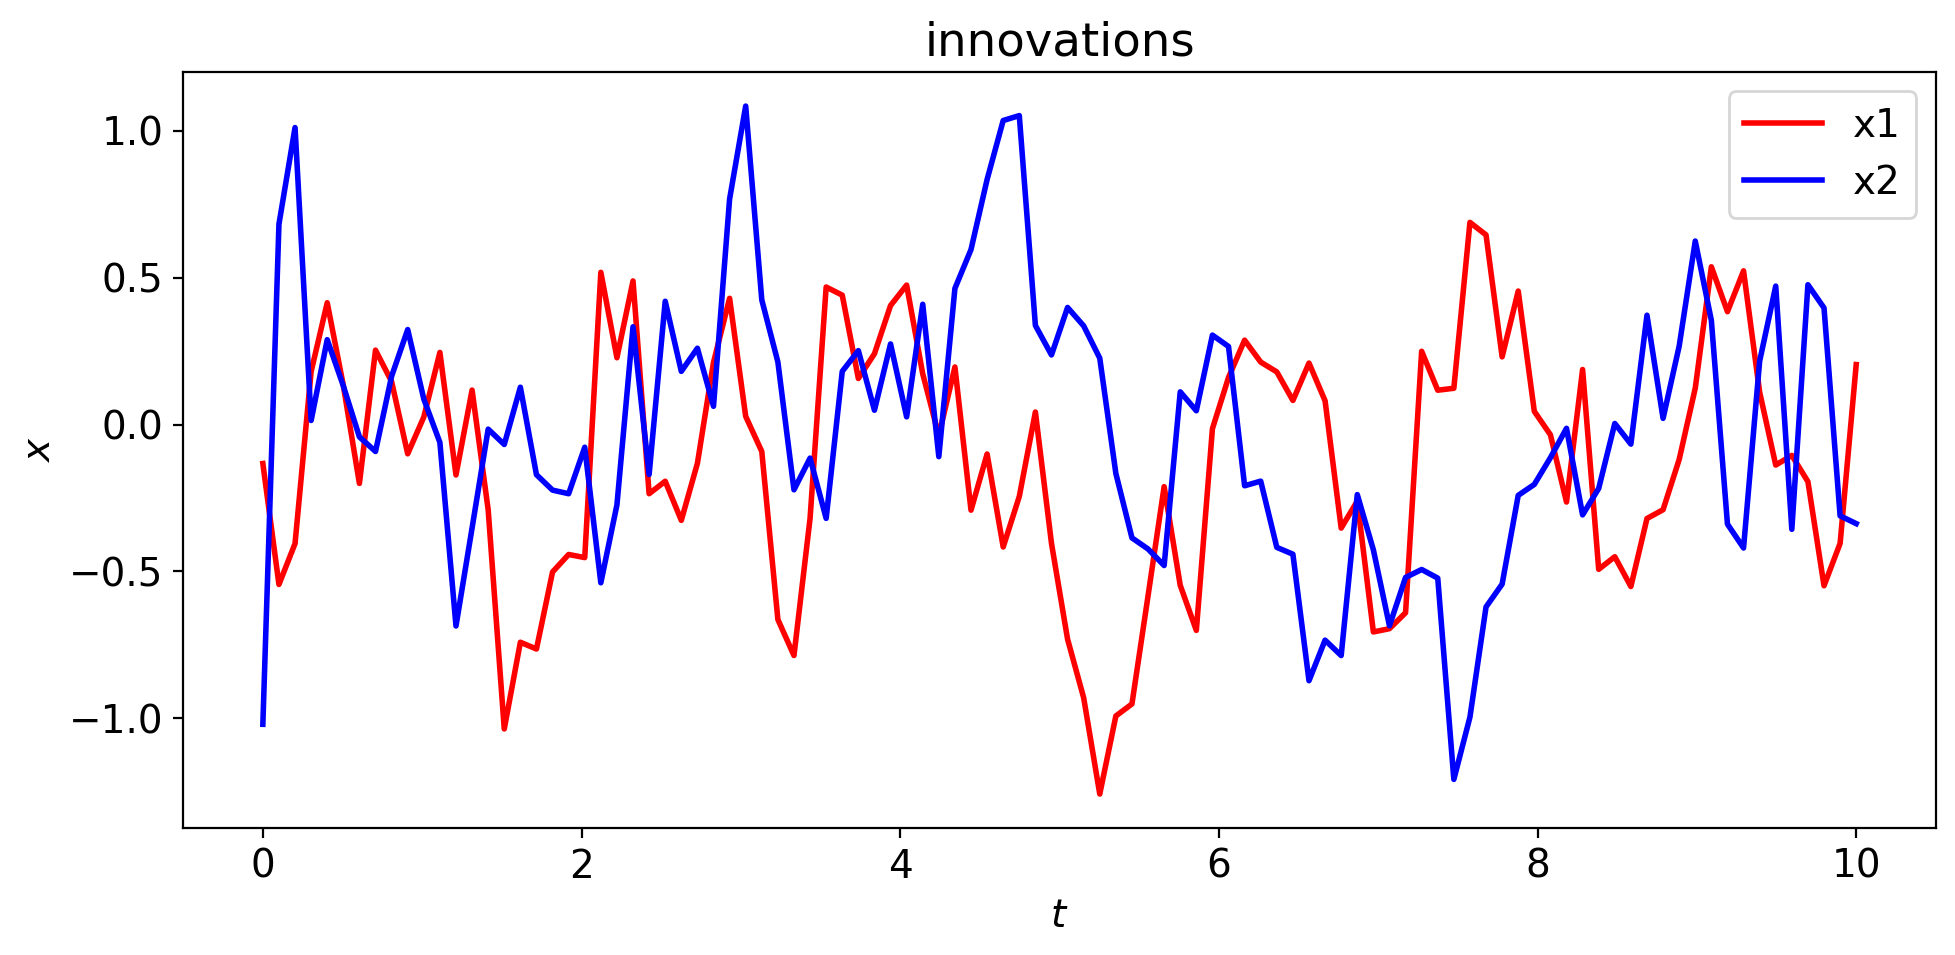

In [ ]:
# Plot results

xdata = times
ydata = jnp.asarray(xs) - jnp.asarray(x_hats)

fig, ax1 = plt.subplots()

# Price
color = 'k'
ax1.set_xlabel('$t$')
ax1.set_ylabel('$x$', color=color)
ax1.plot(xdata, ydata[:,0], color='red', label='x1', lw=2)
ax1.plot(xdata, ydata[:,1], color='blue', label='x2', lw=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.legend()
plt.title('innovations')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
# Let's try to import some data

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive')

data_import = pd.read_pickle('/content/gdrive/MyDrive/datasets/stock_scrape.pkl')
data_import

Mounted at /content/gdrive


Price       Adj Close                                                         \
Ticker            EEM        EFA        EWJ        EWZ        FXI        GDX   
Date                                                                           
2015-01-02  31.830830  46.765957  38.916451  23.435835  33.284714  17.354595   
2015-01-05  31.264336  45.662045  38.467148  22.633873  33.164928  17.812737   
2015-01-06  31.132971  45.144825  37.845032  23.038164  32.757648  18.756521   
2015-01-07  31.806200  45.646614  38.398026  23.661177  33.620113  18.408331   
2015-01-08  32.348076  46.264172  38.881893  24.038960  33.891632  18.133442   
...               ...        ...        ...        ...        ...        ...   
2024-03-07  40.860001  79.510002  71.339996  33.099998  23.330000  29.610001   
2024-03-08  40.820000  79.250000  71.180000  32.330002  23.469999  29.639999   
2024-03-11  40.910000  78.800003  69.599998  32.119999  24.040001  30.129999   
2024-03-12  41.360001  79.430000  69.980003  32.549999  24.559999  29.580000   
2024-03-13  41.230000  79.440002  69.370003  32.680000  24.639999  30.290001   

Price                                                      ...    Volume  \
Ticker             IWM         QQQ        SLV         SPY  ...       GDX   
Date                                                       ...             
2015-01-02  105.352676   95.831276  15.110000  174.806732  ...  47287400   
2015-01-05  103.944214   94.425545  15.500000  171.649841  ...  46021100   
2015-01-06  102.145981   93.159447  15.830000  170.033066  ...  76091200   
2015-01-07  103.403839   94.360374  15.850000  172.151917  ...  45809700   
2015-01-08  105.157837   96.166420  15.640000  175.206757  ...  46813900   
...                ...         ...        ...         ...  ...       ...   
2024-03-07  206.960007  445.450012  22.240000  514.809998  ...  25808800   
2024-03-08  206.830002  439.019989  22.230000  511.720001  ...  32708800   
2024-03-11  205.190002  437.390015  22.350000  511.279999  ...  28314000   
2024-03-12  204.910004  443.660004  22.090000  516.780029  ...  25334200   
2024-03-13  205.710007  440.250000  22.790001  515.969971  ...  24660200   

Price                                                                   \
Ticker           IWM       QQQ       SLV        SPY       TZA      UNG   
Date                                                                     
2015-01-02  46133100  31314600   8759900  121465900     89988   939575   
2015-01-05  51141900  36521300   9535900  169632600     90591   986050   
2015-01-06  67446000  66205500   9969900  209151400    142185   553613   
2015-01-07  32252100  37577400   8129300  125346700     95364   970206   
2015-01-08  28361700  40212600   5063800  147217800    104171   900994   
...              ...       ...       ...        ...       ...      ...   
2024-03-07  28020200  44526700  18890500   58652100  19710100  6188900   
2024-03-08  41430500  71954300  27229400   86425500  28866500  4143100   
2024-03-11  24435800  45860000  15364500   62557200  15142200  4374500   
2024-03-12  34958900  55300900  16339600   73114400  20239800  6887700   
2024-03-13  25067600  37805200  27054800   55005200  16287600  6408300   

Price                                     
Ticker           VWO       XLF       XLI  
Date                                      
2015-01-02  17844900  40511471  10982800  
2015-01-05  17336400  50770502  15144700  
2015-01-06  13779200  57454463  19209800  
2015-01-07  11570800  36287049  11770300  
2015-01-08   9996800  37995923  11419800  
...              ...       ...       ...  
2024-03-07   7739600  35505100   7936800  
2024-03-08  12121100  47264300  10153000  
2024-03-11   6976400  36233100   9179300  
2024-03-12   6316500  53199300   9125300  
2024-03-13  10209100  43469800   8009300  

[2314 rows x 90 columns]

In [ ]:
# Choose a symbol
SYMBOL = 'QQQ'
df = data_import['Adj Close']
df = df.dropna(axis='columns')

# Remove old data
df = df.loc['2020-01-01':]
y = df[SYMBOL].values
t = df.index.values

# Clean data
ydata = np.log(y)
xdata = np.array(range(t.shape[0]))

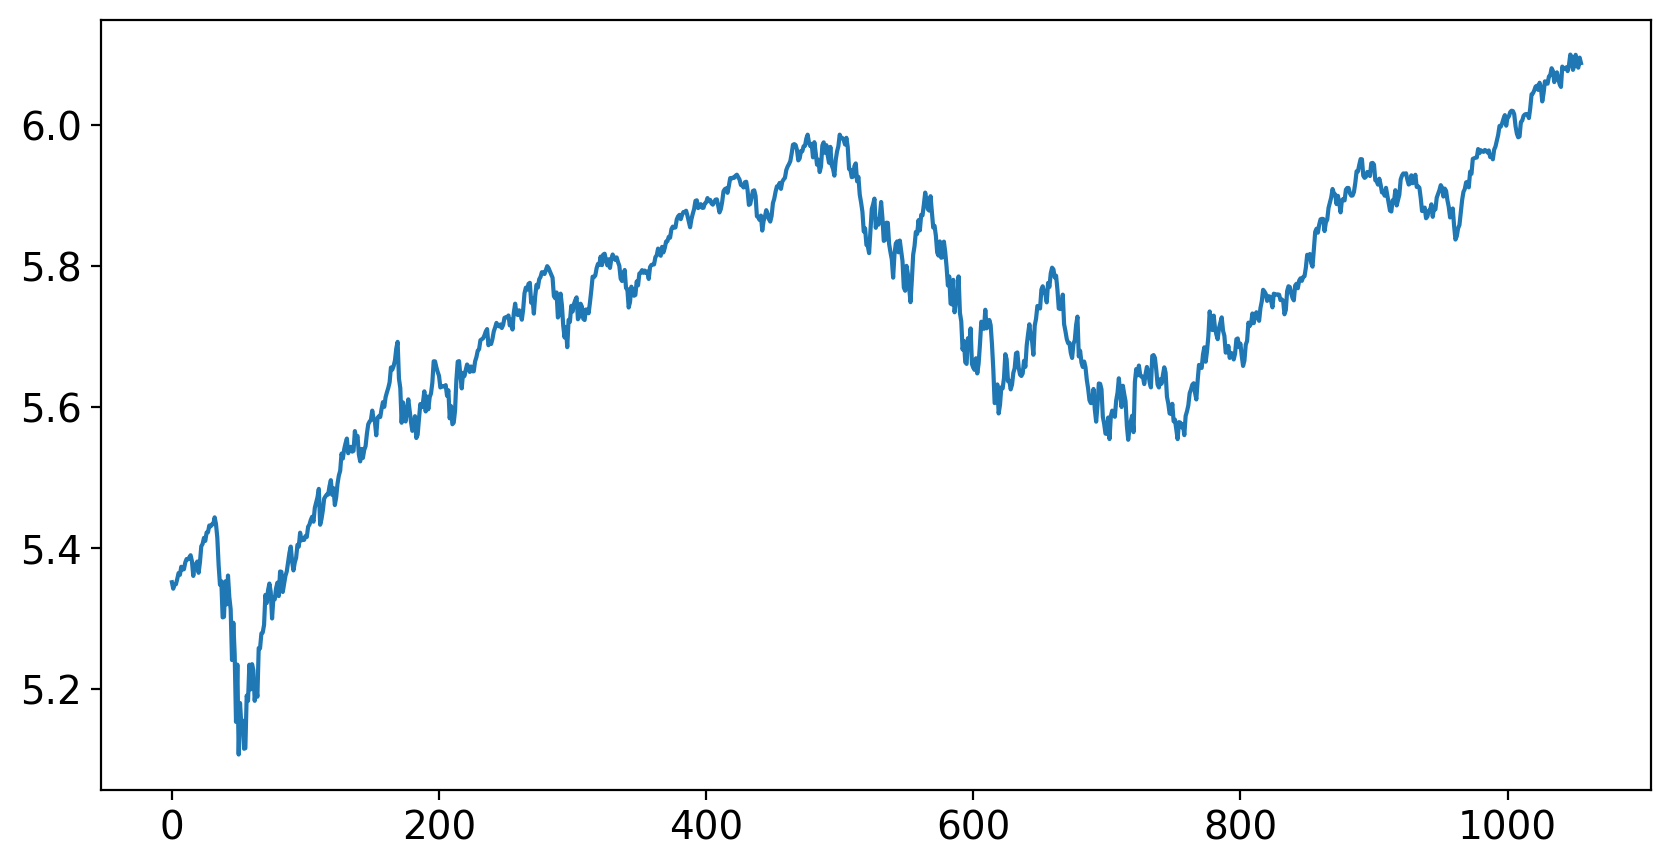

In [ ]:
plt.plot(xdata, ydata)

In [ ]:
# Real data

no_steps = len(xdata)

xs = []
us = []
zs = []

for i in range(no_steps):
    x_ = xdata[i]
    u_ = 0.0
    us.append(u_)
    zs.append(measurement(x_))

    x_new = fwd_process(x_last, u_last)
    xs.append(x_new)

xs.pop()